# Enumerating tree (aka powerset)

## using itertools lib

In [27]:
import itertools
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Combination

In [30]:
def powerset(l):
    return [list(itertools.combinations(l, s)) for s in range(len(l)+1)]

In [31]:
powerset(range(5))

[[()],
 [(0,), (1,), (2,), (3,), (4,)],
 [(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (1, 2),
  (1, 3),
  (1, 4),
  (2, 3),
  (2, 4),
  (3, 4)],
 [(0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 2, 3),
  (0, 2, 4),
  (0, 3, 4),
  (1, 2, 3),
  (1, 2, 4),
  (1, 3, 4),
  (2, 3, 4)],
 [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 3, 4), (0, 2, 3, 4), (1, 2, 3, 4)],
 [(0, 1, 2, 3, 4)]]

In [32]:
tmp = powerset(range(20))

In [33]:
length = [len(i) for i in tmp]

sum(length) == 2**20

True

In [34]:
2**20

1048576

## From scratch

In [35]:
def add_node(tree, node,):
    tree[node] = {}
    return tree

In [36]:
def add_branches(tree, node):
    tree[node]["left"] = {}
    tree[node]["right"] = {}
    return tree

### Generate Tree

In [37]:
def generate_tree(items):
    # initialize the tree
    tree = {}
    for i in range(len(items)):
        tree = add_node(tree=tree, node=items[i]+1)
        tree = add_branches(tree=tree, node=items[i]+1)


    # adding possible parent nodes
    r = 0
    while r < len(items):
        for j in range(len(items)+1):
            if j != r and r <= j:
                add_node(tree=tree[j]["left"], node=r)
                add_node(tree=tree[j]["right"], node=r)
        r += 1 


    # adding (possible) edges children and their parents and ancestors
#     rr = 0
#     while rr < len(items):
#         for j in range(len(items)+1):
#             if j != rr and rr < j:
#                 add_branches(tree=tree[j]["left"], node=rr)
#                 add_branches(tree=tree[j]["right"], node=rr)
#         rr += 1 

    return tree

In [38]:
N = 4
t_tree = generate_tree(items=list(range(N)))
t_tree

{1: {'left': {0: {}}, 'right': {0: {}}},
 2: {'left': {0: {}, 1: {}}, 'right': {0: {}, 1: {}}},
 3: {'left': {0: {}, 1: {}, 2: {}}, 'right': {0: {}, 1: {}, 2: {}}},
 4: {'left': {0: {}, 1: {}, 2: {}, 3: {}},
  'right': {0: {}, 1: {}, 2: {}, 3: {}}}}

### Binary tree

In [39]:
left_child = lambda x: 2*x+1

right_child = lambda x: 2*x+2

b_tree = {}
N = 5
for i in range(N):
    b_tree[i] = {}
    b_tree[i]["left"] = left_child(i)
    b_tree[i]["righ"] = right_child(i)

In [40]:
b_tree

{0: {'left': 1, 'righ': 2},
 1: {'left': 3, 'righ': 4},
 2: {'left': 5, 'righ': 6},
 3: {'left': 7, 'righ': 8},
 4: {'left': 9, 'righ': 10}}

In [41]:
g = nx.DiGraph()
g.add_nodes_from(list(range(N)))
for k, v in b_tree.items():
    g.add_edges_from(([(k, vv) for kk, vv in v.items()]))

In [42]:
 g.edges()

OutEdgeView([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (4, 10)])

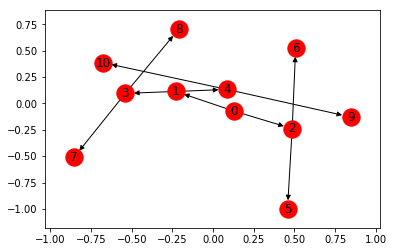

In [46]:
nx.draw_networkx(g)
plt.show()

In [48]:
# b_tree = {}
# i = 0
# while i <= N:
#     print("while", i, b_tree)
#     if i == 0:
#         b_tree[i] = {}
#         b_tree[i]["left"] = left_child(i)
#         b_tree[i]["right"] = right_child(i)
#         i += 1
#     else:
#         print(i, "b_tree_add:", b_tree)
#         for j in range(1, i):
#             b_tree[i][j] = {}
#         b_tree[i-1][i]["left"] = left_child(i)
#         b_tree[i-1][i]["right"] = right_child(i)
#         i += 1
    

In [50]:
# def comb(tree):
#     depth = (tree.keys())
#     comb = [list(depth)]

#     for d in depth:
#         tmp_l = list(tree[d]["left"].keys())
#         tmp_r = list(tree[d]["right"].keys())[::-1]
#         if tmp_l not in comb:
#             comb.append(tmp_l)
#         if tmp_r not in comb:
#             comb.append(tmp_r)
#     return comb

In [49]:
for i in range(10):
    tree = generate_tree(items=list(range(i)))
    print("Generating tree with "+ str(i), "nodes")
    print(tree)
    print(" ")

Generating tree with 0 nodes
{}
 
Generating tree with 1 nodes
{1: {'left': {0: {}}, 'right': {0: {}}}}
 
Generating tree with 2 nodes
{1: {'left': {0: {}}, 'right': {0: {}}}, 2: {'left': {0: {}, 1: {}}, 'right': {0: {}, 1: {}}}}
 
Generating tree with 3 nodes
{1: {'left': {0: {}}, 'right': {0: {}}}, 2: {'left': {0: {}, 1: {}}, 'right': {0: {}, 1: {}}}, 3: {'left': {0: {}, 1: {}, 2: {}}, 'right': {0: {}, 1: {}, 2: {}}}}
 
Generating tree with 4 nodes
{1: {'left': {0: {}}, 'right': {0: {}}}, 2: {'left': {0: {}, 1: {}}, 'right': {0: {}, 1: {}}}, 3: {'left': {0: {}, 1: {}, 2: {}}, 'right': {0: {}, 1: {}, 2: {}}}, 4: {'left': {0: {}, 1: {}, 2: {}, 3: {}}, 'right': {0: {}, 1: {}, 2: {}, 3: {}}}}
 
Generating tree with 5 nodes
{1: {'left': {0: {}}, 'right': {0: {}}}, 2: {'left': {0: {}, 1: {}}, 'right': {0: {}, 1: {}}}, 3: {'left': {0: {}, 1: {}, 2: {}}, 'right': {0: {}, 1: {}, 2: {}}}, 4: {'left': {0: {}, 1: {}, 2: {}, 3: {}}, 'right': {0: {}, 1: {}, 2: {}, 3: {}}}, 5: {'left': {0: {}, 1: {